In [1]:
from autstr.buildin.presentations import buechi_arithmetic
from visual_automata.fa.dfa import VisualDFA
from autstr.utils.automata_tools import iterate_language

In [2]:
ba = buechi_arithmetic()

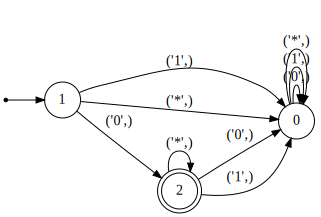

In [3]:
# Define zero
ba.update(O='A(x,x,x)')
VisualDFA(ba.automata['O']).show_diagram()

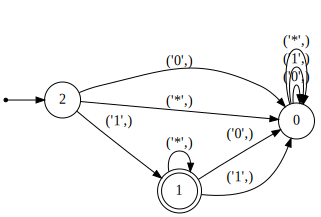

In [4]:
# Define one
ba.update(I='not O(x) and forall y z.(O(y) or O(z) or not A(y, z, x))')
VisualDFA(ba.automata['I']).show_diagram()

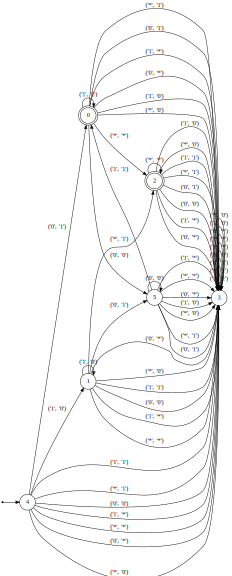

In [5]:
# Define successor
ba.update(S='exists x.(I(x) and A(u, x, v))')
VisualDFA(ba.automata['S']).show_diagram()

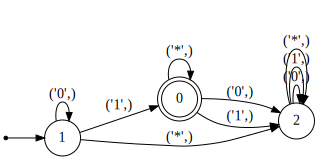

In [6]:
# Define powers of two
ba.update(P='B(x,x)')
VisualDFA(ba.automata['P']).show_diagram()

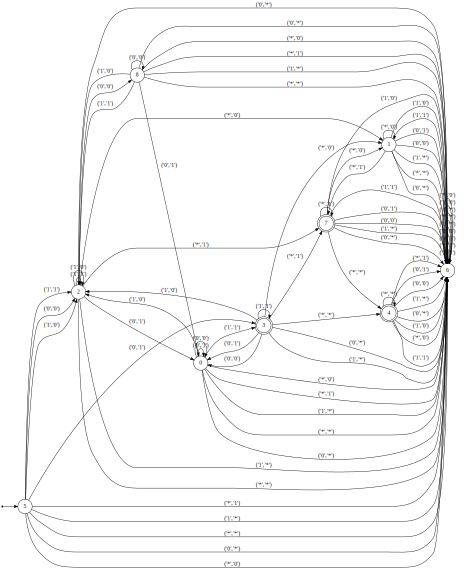

In [7]:
# Define linear order
ba.update(Smaller='exist z.(not O(z) and A(x, z, y))')
VisualDFA(ba.automata['Smaller']).show_diagram()

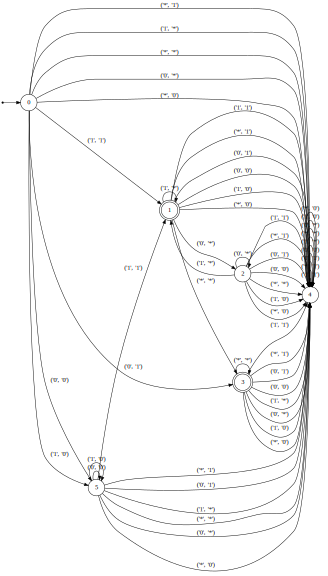

In [8]:
# Define bit predicate E(x, y) <=> y==2^n bin(x)[n] == 1
ba.update(
    E='exists x0 x1.(P(y) and Smaller(x0, y) and A(x0, x1, x) and B(x1, y) and not exists y1.(Smaller(y, y1) and B(x1, y1)))'
)
VisualDFA(ba.automata['E']).show_diagram()

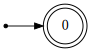

In [9]:
# Evaluate 'between a number x>0 and its double lies a power of 2'
a = ba.evaluate('forall x.(O(x) or exists y u v w.(A(x, x, y) and A(x, u, v) and P(v) and A(v, w, y)))')
VisualDFA(a).show_diagram()